## Importing Libraries

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings 
warnings.filterwarnings(action= 'ignore')

## Importing Dataset

In [248]:
original_dataset = pd.read_csv('train_data.csv')
original_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [249]:
original_dataset.shape

(8523, 12)

In [250]:
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [251]:
df = original_dataset.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Exploratory Data Analysis

In [252]:
df.dtypes.value_counts()

object     7
float64    4
int64      1
dtype: int64

### Seperating Numerical and Categorical Features

In [253]:
numerical_features = [features for features in df.columns if df[features].dtypes !='O']
print('numerical variable: ', len(numerical_features))
print(numerical_features)

numerical variable:  5
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [254]:
categorical_features = [features for features in df.columns if df[features].dtypes =='O' 
                        and features not in ['Item_Identifier','Outlet_Identifier']]

print('categorical variable: ', len(categorical_features))
print(categorical_features)

categorical variable:  5
['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [255]:
df[numerical_features].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [256]:
for feature in numerical_features:
    print(feature, len(df[feature].unique()))

Item_Weight 416
Item_Visibility 7880
Item_MRP 5938
Outlet_Establishment_Year 9
Item_Outlet_Sales 3493


In [257]:
continuous_num_featutre = [feature for feature in numerical_features if feature not in ['Outlet_Establishment_Year']]
df[continuous_num_featutre].head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


In [258]:
len(df['Outlet_Identifier'].unique())

10

#### There are 10 outlets. Let's see there individual Sales in 2013

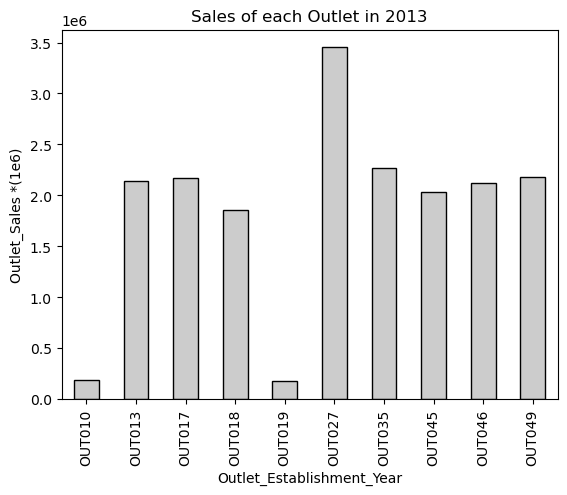

In [259]:
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().plot.bar(color=('0.8'), edgecolor='black')

plt.title('Sales of each Outlet in 2013')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Outlet_Sales *(1e6)')
plt.show()

* OUT027 has the maximum sales
* OUT010 and OUT019 has minimum Sales

In [260]:
for feature in categorical_features:
    print(feature, len(df[feature].unique()))

Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [261]:
df['Item_category'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['Item_category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [262]:
df['Item_category'] = df['Item_category'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['Item_category'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_category, dtype: int64

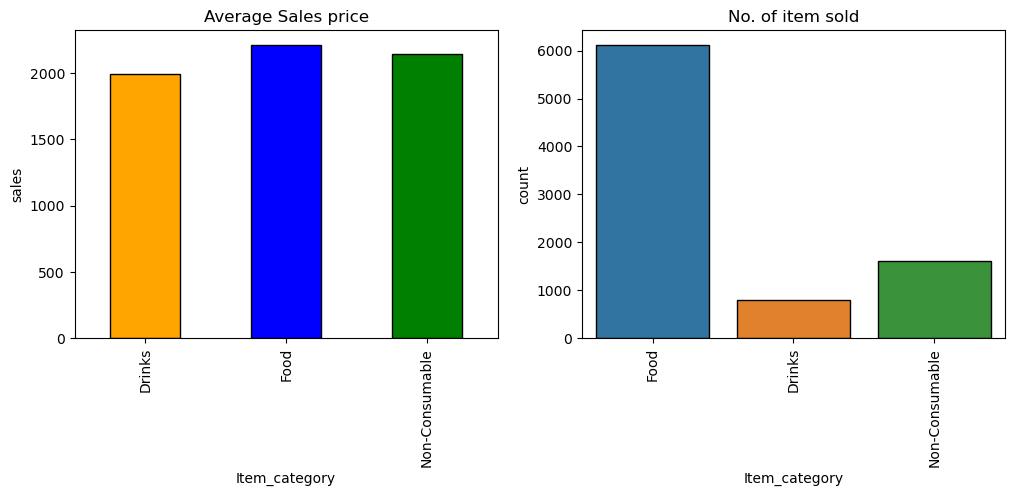

In [263]:
plt.figure(figsize=(12,4))
df1=df.copy()

plt.subplot(1,2,1)
c = ['orange','blue','green']
df.groupby('Item_category')['Item_Outlet_Sales'].mean().plot.bar(color=c, edgecolor='black')
plt.xlabel('Item_category')
plt.ylabel('sales')
plt.title('Average Sales price')

plt.subplot(1,2,2)
sns.countplot(df['Item_category'], edgecolor='black')
plt.title('No. of item sold')
plt.xticks(rotation = 90)

plt.show()

* The demand of **Food items** are very large as compared to Drinks/Non-food items

### Comparing sales of items on basis of Item_Fat_Content

In [264]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

* There are only 2 categories but 5 are defined

In [265]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(to_replace=["Low Fat","LF",'low fat'], value="Low Fat")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(to_replace=["Regular",'reg'], value="Regular")

In [266]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

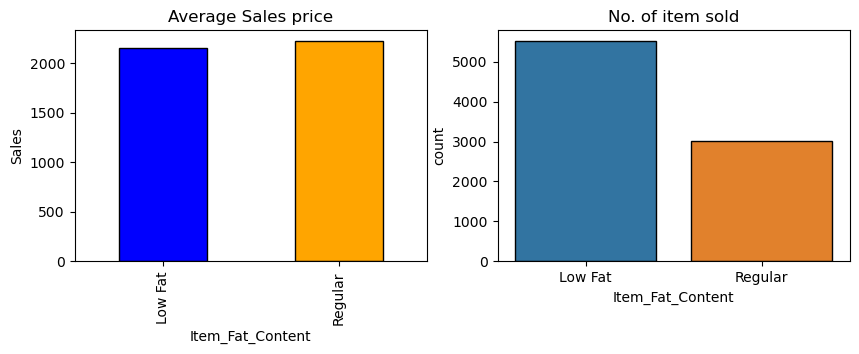

In [267]:
plt.figure(figsize=(10,3))
df1=df.copy()

plt.subplot(1,2,1)
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot.bar(color=('blue','orange'), edgecolor='black')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Sales')
plt.title('Average Sales price')

plt.subplot(1,2,2)
sns.countplot(df['Item_Fat_Content'], edgecolor='black')
plt.title('No. of item sold')

plt.show()

* Average sales price of Low Fat and Regular are almost equal, but Low Fat items sold almost **twice** as much of regular items

### Comparing sales of Different types of items

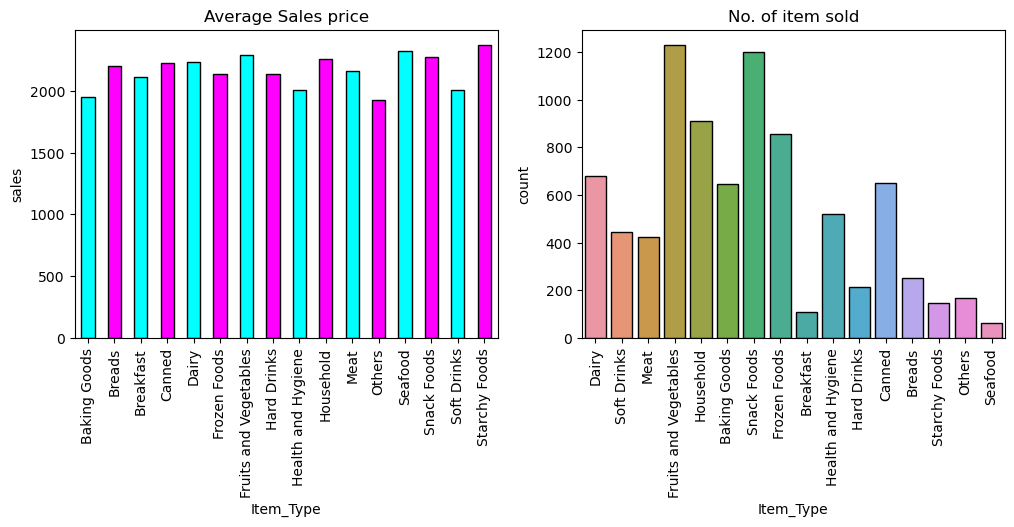

In [268]:
plt.figure(figsize=(12,4))
df1=df.copy()

plt.subplot(1,2,1)
df.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot.bar(color=('cyan','magenta'), edgecolor='black')
plt.xlabel('Item_Type')
plt.ylabel('sales')
plt.title('Average Sales price')

plt.subplot(1,2,2)
sns.countplot(df['Item_Type'], edgecolor='black')
plt.title('No. of item sold')
plt.xticks(rotation = 90)

plt.show()

* Average Sales Price of each Item_Type is almost similar.
* **Fruits/Vegetables and Snack** foods are top selling Item_Type whereas **Breakfast/Starchy Foods/Seafood** are very low selling products which can be removed to **decrease the cost** of particular outlets

### Compare  Sales of different Outlet_size

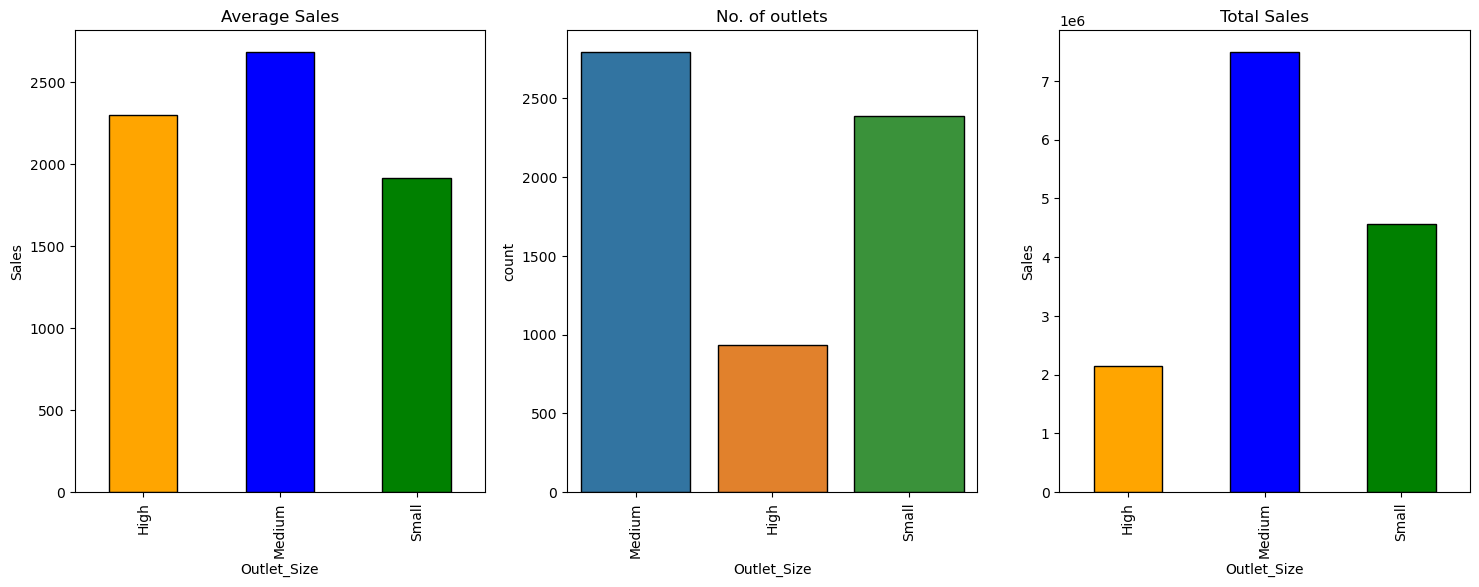

In [269]:
plt.figure(figsize=(18,6))
df1=df.copy()

plt.subplot(1,3,1)
c = ['orange','blue','green']
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot.bar(color=c, edgecolor='black')
plt.xlabel('Outlet_Size')
plt.ylabel('Sales')
plt.title('Average Sales')


plt.subplot(1,3,2)
sns.countplot(df['Outlet_Size'], edgecolor='black')
plt.title('No. of outlets')
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
c = ['orange','blue','green']
df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().plot.bar(color=c, edgecolor='black')
plt.xlabel('Outlet_Size')
plt.ylabel('Sales')
plt.title('Total Sales')


plt.show()

* Average Sales of **medium outlets** are highest.
* Average Sales of **small outlets** are minimum and by great margin
* The **no. of medium sized outlets are more**; and therefore total sales of medium sized outlets are far more than others.

### Compare Sales of different Outlet_Location

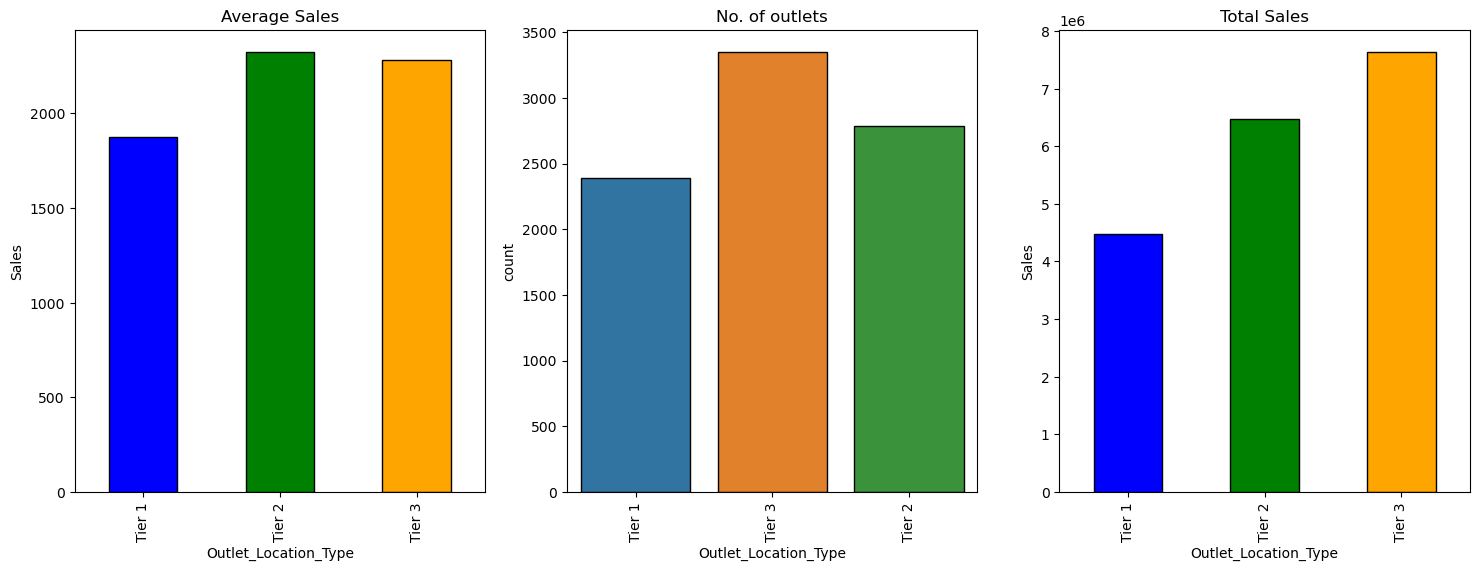

In [270]:
plt.figure(figsize=(18,6))
df1=df.copy()

plt.subplot(1,3,1)
c = ['blue','green','orange']
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.bar(color=c, edgecolor='black')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Sales')
plt.title('Average Sales')


plt.subplot(1,3,2)
sns.countplot(df['Outlet_Location_Type'], edgecolor='black')
plt.title('No. of outlets')
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
c = ['blue','green','orange']
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().plot.bar(color=c, edgecolor='black')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Sales')
plt.title('Total Sales')


plt.show()

* Tier-3 Cities has maximum no. of outlets and therefore has maximum sales.
    * Tier-1 cities has **low average sales** as of tier-2 and tier-3 cities

### Compare Sales of different Outlet_type

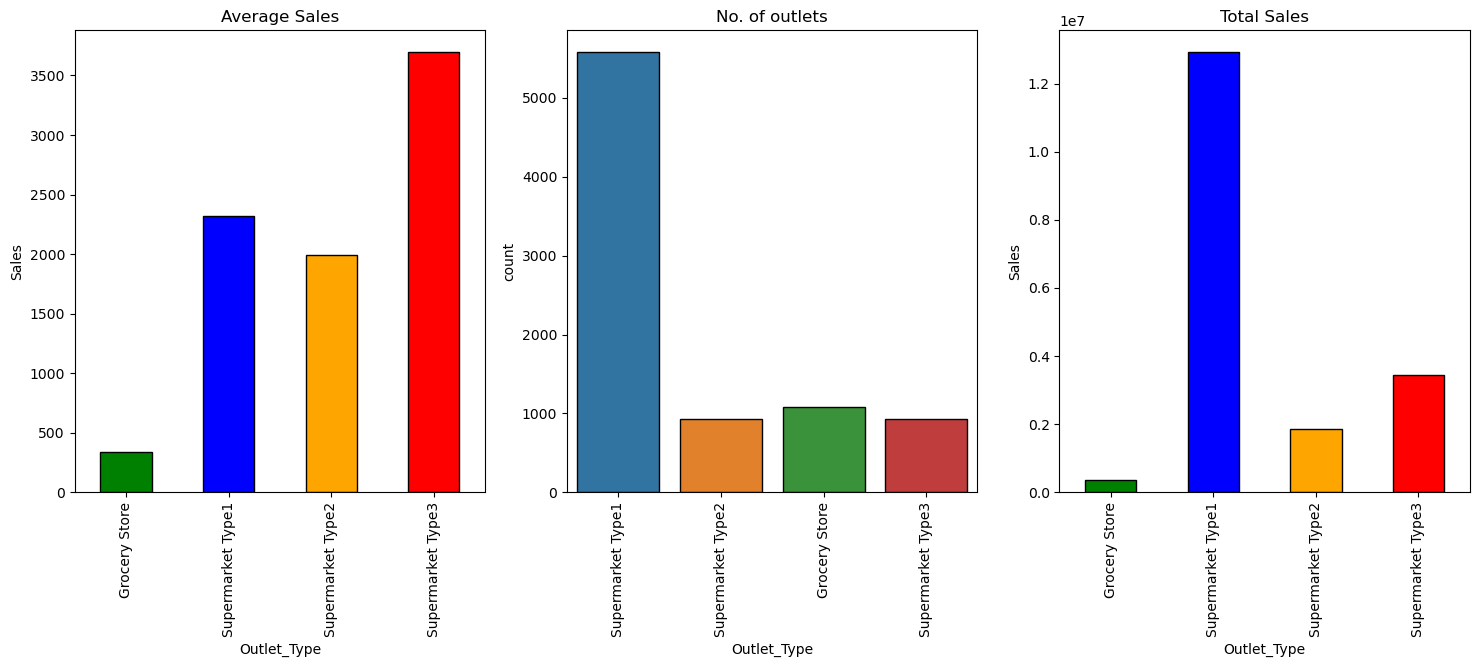

In [271]:
plt.figure(figsize=(18,6))
df1=df.copy()

plt.subplot(1,3,1)
c = ['green','blue','orange','red']
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar(color=c, edgecolor='black')
plt.xlabel('Outlet_Type')
plt.ylabel('Sales')
plt.title('Average Sales')


plt.subplot(1,3,2)
sns.countplot(df['Outlet_Type'], edgecolor='black')
plt.title('No. of outlets')
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
c = ['green','blue','orange','red']
df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().plot.bar(color=c, edgecolor='black')
plt.xlabel('Outlet_Type')
plt.ylabel('Sales')
plt.title('Total Sales')


plt.show()

* Average Sales of **Supermarket Type3** are maximum with great margins.
* But no. of product sold is highest in **Supermarket Type1** and thus has **highest total sales**.

## Visualizing Continuous Features

In [272]:
df[continuous_num_featutre].head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


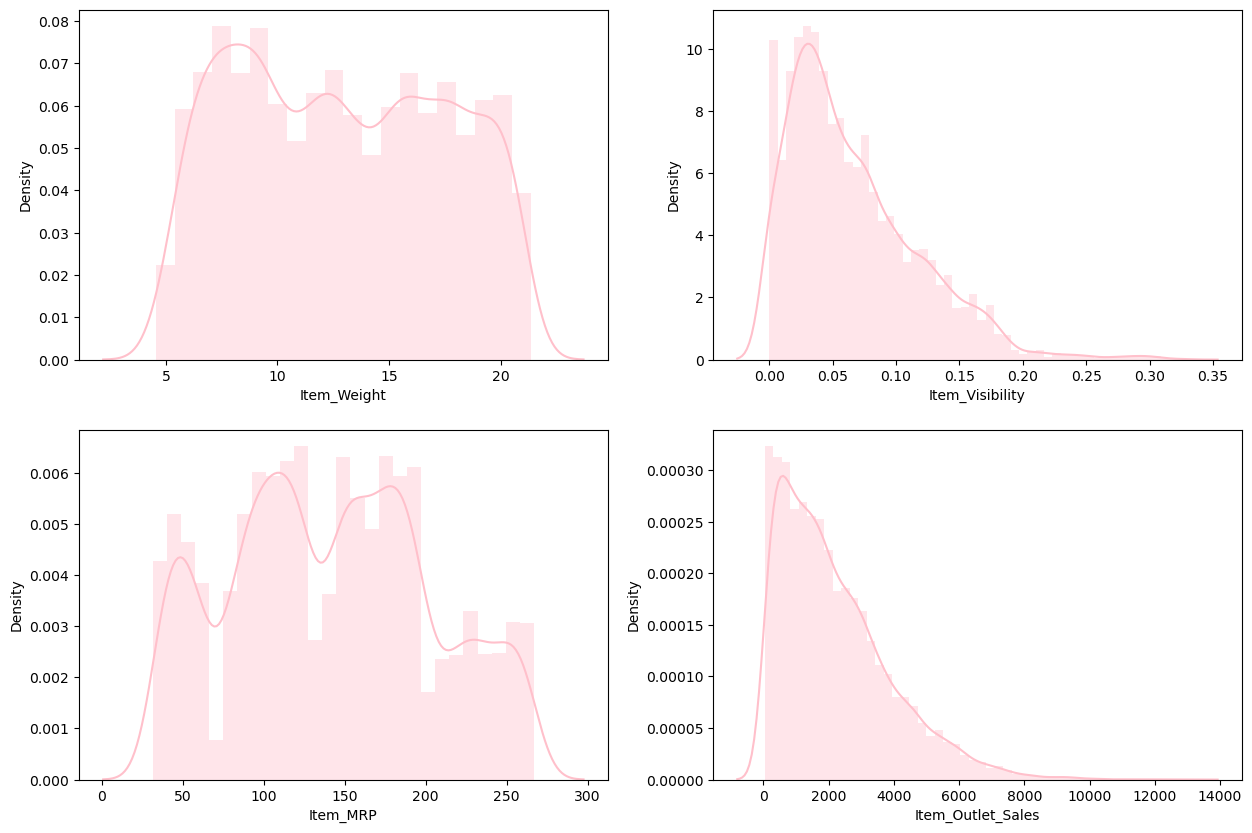

In [273]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.distplot(df['Item_Weight'],color='pink')

plt.subplot(2,2,2)
sns.distplot(df['Item_Visibility'],color='pink')

plt.subplot(2,2,3)
sns.distplot(df['Item_MRP'],color='pink')

plt.subplot(2,2,4)
sns.distplot(df['Item_Outlet_Sales'],color='pink')

plt.show()

# Data Preprocessing

## Handling Missing Values

In [274]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_category                   0
dtype: int64

We have 2 columns that contains **Missing Values**.

### 1. For Item_Weight

In [275]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

#### Replace missing values in Item_Weight by average value

In [276]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

### 2. For Outlet_Size

In [277]:
# Checking percentage of each outlets_Size

val = df['Outlet_Size'].value_counts()
percentage = val*100 / val.sum()

print('Total Values: ')
print(val, '\n')
print('Percentage :')
print(percentage)

Total Values: 
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Percentage :
Medium    45.689514
Small     39.064289
High      15.246197
Name: Outlet_Size, dtype: float64


Medium sized outlets have maximum nos. but not by much margin. If we assign all NaN values(2410 values) with Medium,  it almost doubles the medium outlets. Therefore replaceing with a median is not a good idea.
* Let's try **Random Sample Imputation**

In [278]:
random_val = df['Outlet_Size'].dropna().sample(df['Outlet_Size'].isnull().sum(),random_state=0)
print(len(random_val))

# we get random values fro each of our missing values. Now replace all random_val with nan values

random_val.index = df[df['Outlet_Size'].isnull()].index
df.loc[df['Outlet_Size'].isnull(),'Outlet_Size'] = random_val

2410


In [279]:
df['Outlet_Size'].isnull().sum()

0

In [280]:
val = df['Outlet_Size'].value_counts()
percentage = val*100 / val.sum()

print('Total Values: ')
print(val, '\n')
print('Percentage :')
print(percentage)

Total Values: 
Medium    3873
Small     3342
High      1308
Name: Outlet_Size, dtype: int64 

Percentage :
Medium    45.441746
Small     39.211545
High      15.346709
Name: Outlet_Size, dtype: float64


* We replaced all nan values with the percentage of each Outlet_Size being almost same

## Handling categorical Variables --> Encoding

In [281]:
for feature in categorical_features:
    print(feature, len(df[feature].unique()))
    print(df[feature].unique() , '\n')

Item_Fat_Content 2
['Low Fat' 'Regular'] 

Item_Type 16
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

Outlet_Size 3
['Medium' 'Small' 'High'] 

Outlet_Location_Type 3
['Tier 1' 'Tier 3' 'Tier 2'] 

Outlet_Type 4
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 



* We can use **Label Encoder** for 'Item_Fat_Content' , 'Outlet_Size' , 'Outlet_Type' as they are ordinal features.
* We can apply **One-Hot Encoding** for remaining 2 categories.

#### Label Encoding for Item_Fat_Content

In [282]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [283]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'Low Fat':1, 'Regular':2})
df['Item_Fat_Content'].value_counts()
                                                         

1    5517
2    3006
Name: Item_Fat_Content, dtype: int64

#### Label Encoding for Outlet_Size

In [284]:
df['Outlet_Size'].value_counts()

Medium    3873
Small     3342
High      1308
Name: Outlet_Size, dtype: int64

In [285]:
df['Outlet_Size'] = df['Outlet_Size'].replace({'Small':1, 'Medium':2, 'High':3})
df['Outlet_Size'].value_counts()

2    3873
1    3342
3    1308
Name: Outlet_Size, dtype: int64

#### Label Encoding for Outlet_Type

In [286]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [287]:
df['Outlet_Type'] = df['Outlet_Type'].replace({'Grocery Store':1, 'Supermarket Type3':2, 
                                               'Supermarket Type2':3, 'Supermarket Type1':4})
df['Outlet_Type'].value_counts()

4    5577
1    1083
2     935
3     928
Name: Outlet_Type, dtype: int64

### One Hot Encoding for  remaining categorical variables

In [288]:
dummies = pd.get_dummies(df[['Item_Type','Outlet_Location_Type','Item_category','Outlet_Identifier']],drop_first=True)
dummies.shape

(8523, 28)

In [289]:
df = pd.concat([df,dummies],axis=1)
df.drop(columns=['Item_Type','Outlet_Location_Type','Item_category','Outlet_Identifier'], axis=1, inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,...,Item_category_Non-Consumable,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.30,1,0.016047,249.8092,1999,2,4,3735.1380,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,2,0.019278,48.2692,2009,2,3,443.4228,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,1,0.016760,141.6180,1999,2,4,2097.2700,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,2,0.000000,182.0950,1998,1,1,732.3800,0,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,1,0.000000,53.8614,1987,3,4,994.7052,0,...,1,1,0,0,0,0,0,0,0,0


### Transforming Outlet_Establishment_Year

In [290]:
df['Outlet_duration'] = 2013 - df['Outlet_Establishment_Year']
df.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_duration
0,FDA15,9.30,1,0.016047,249.8092,2,4,3735.1380,0,0,...,0,0,0,0,0,0,0,0,1,14
1,DRC01,5.92,2,0.019278,48.2692,2,3,443.4228,0,0,...,0,0,1,0,0,0,0,0,0,4
2,FDN15,17.50,1,0.016760,141.6180,2,4,2097.2700,0,0,...,0,0,0,0,0,0,0,0,1,14
3,FDX07,19.20,2,0.000000,182.0950,1,1,732.3800,0,0,...,0,0,0,0,0,0,0,0,0,15
4,NCD19,8.93,1,0.000000,53.8614,3,4,994.7052,0,0,...,1,0,0,0,0,0,0,0,0,26


## Model Training

In [291]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.25,random_state=420)

train_x = train.drop(['Item_Identifier','Item_Outlet_Sales'], axis=1)
train_y = train['Item_Outlet_Sales']

test_x = test.drop(['Item_Identifier','Item_Outlet_Sales'], axis=1)
test_y = test['Item_Outlet_Sales']

train_x.shape , train_y.shape

((6392, 35), (6392,))

In [292]:
from sklearn.preprocessing import MinMaxScaler as MMS

scaled_features = [feature for feature in train_x.columns]
scaler = MMS()
scaler.fit(df[scaled_features])

MinMaxScaler()

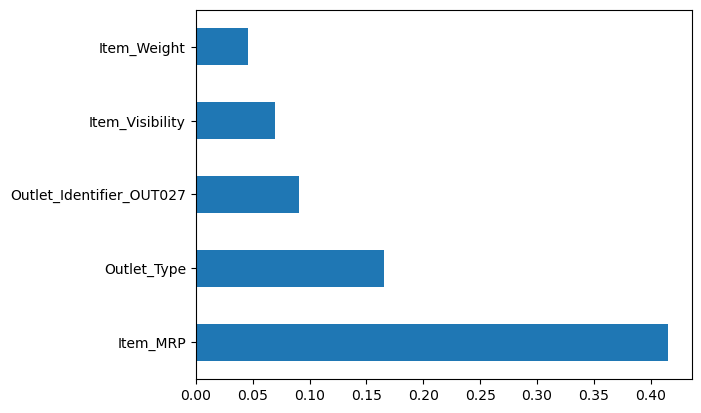

In [293]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(train_x,train_y)

feat_importances = pd.Series(model.feature_importances_, index=train_x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

* Item_MRP is the most Important feature in predicting Item_outlet_sales

In [294]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(train_x,train_y)
y_pred = lin_reg.predict(test_x)

In [295]:
from sklearn import metrics

linear_score = cross_val_score(lin_reg,test_x,test_y,cv=5)
print('Cross Val Score: ', linear_score.mean())

linear_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', linear_RMSE )


Cross Val Score:  0.5505637872059848
Root Mean Squared Error: 1109.7154768928292


In [296]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,0.005,1e-2,0.05,0.1,0.5,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,cv=5)

ridge_regressor.fit(train_x,train_y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
0.5596440802792182


In [297]:
ridge = Ridge(alpha=10)

ridge.fit(train_x,train_y)
y_pred = ridge.predict(test_x)

ridge_score = cross_val_score(ridge,test_x,test_y,cv=10)
print('Cross Val Score: ', ridge_score.mean())

ridge_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', ridge_RMSE)


Cross Val Score:  0.5532333943937292
Root Mean Squared Error: 1109.4448957815982


In [298]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,0.005,1e-2,0.05,0.1,0.5,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5)

lasso_regressor.fit(train_x,train_y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 5}
0.5608375939332028


In [299]:
lasso = Lasso(alpha=5)

lasso.fit(train_x,train_y)
y_pred = lasso.predict(test_x)

lasso_score = cross_val_score(lasso,test_x,test_y,cv=10)
print('Cross Val Score: ', lasso_score.mean())

lasso_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', lasso_RMSE)


Cross Val Score:  0.5561332294824204
Root Mean Squared Error: 1106.7567817044016


In [306]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor()

In [307]:
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters

learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)

#Subssample parameter values
subsample=[0.7,0.6,0.8]

# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

In [308]:
XG_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid,
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

XG_random.fit(train_x,train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   8.7s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   8.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   8.5s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   8.7s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   8.3s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   9.2s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   8.6s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   8.6s
[CV] END learning_ra

[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=  10.0s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=  10.8s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=  10.9s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   9.9s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   8.0s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   6.8s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   6.9s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   7.2s
[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=600, subsa

[CV] END learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   6.9s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   6.7s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsampl

[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=  15.0s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=  15.2s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=  15.2s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=  15.0s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=  12.5s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=  12.7s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=  12.7s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=  12.7s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   3.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   3.4s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   2.7s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, sub

[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   3.3s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   3.8s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   3.3s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   3.7s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   3.6s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   3.4s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   4.2s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   3.3s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsampl

[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   2.7s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   2.8s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, verbose=2)

In [309]:
print(XG_random.best_params_)
print('score: ', XG_random.best_score_)

{'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 10, 'learning_rate': '0.05'}
score:  0.5632477399294183


* Best parameters for XGBoost : {'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 10, 'learning_rate': '0.05'}

In [312]:
XG_reg = XGBRegressor(subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05)
XG_reg.fit(train_x,train_y)
y_pred = XG_reg.predict(test_x)

XG_score = cross_val_score(XG_reg,test_x,test_y,cv=10)
print('Cross Val Score: ', XG_score.mean())

XG_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', XG_RMSE)

Cross Val Score:  0.54622124128212
Root Mean Squared Error: 1108.9610520072422


# Importing Test Dataset

In [358]:
df = pd.read_csv('test_data.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [359]:
Original_df = df.copy()

In [360]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Data Preprocessing for Test Data


In [361]:
numerical_features = [features for features in df.columns if df[features].dtypes !='O']

categorical_features = [features for features in df.columns if df[features].dtypes =='O' 
                        and features not in ['Item_Identifier','Outlet_Identifier']]


continuous_num_featutre = [feature for feature in numerical_features if feature not in ['Outlet_Establishment_Year']]

df['Item_category'] = df['Item_Identifier'].apply(lambda x: x[:2])

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(to_replace=["Low Fat","LF",'low fat'], value="Low Fat")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(to_replace=["Regular",'reg'], value="Regular")

df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

random_val = df['Outlet_Size'].dropna().sample(df['Outlet_Size'].isnull().sum(),random_state=0)
random_val.index = df[df['Outlet_Size'].isnull()].index
df.loc[df['Outlet_Size'].isnull(),'Outlet_Size'] = random_val

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'Low Fat':1, 'Regular':2})
                                                         
df['Outlet_Size'] = df['Outlet_Size'].replace({'Small':1, 'Medium':2, 'High':3})

df['Outlet_Type'] = df['Outlet_Type'].replace({'Grocery Store':1, 'Supermarket Type3':2, 
                                               'Supermarket Type2':3, 'Supermarket Type1':4})

dummies = pd.get_dummies(df[['Item_Type','Outlet_Location_Type','Item_category','Outlet_Identifier']],drop_first=True)

df = pd.concat([df,dummies],axis=1)
df.drop(columns=['Item_Type','Outlet_Location_Type','Item_category','Outlet_Identifier'], axis=1, inplace=True)

df['Outlet_duration'] = 2013 - df['Outlet_Establishment_Year']
df.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)


test_x = df.drop(['Item_Identifier'], axis=1)

scaled_features = [feature for feature in test_x.columns]
scaler = MMS()
scaler.fit(df[scaled_features])

MinMaxScaler()

In [362]:
test_x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_duration
0,20.750000,1,0.007565,107.8622,2,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,14
1,8.300000,2,0.038428,87.3198,2,4,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
2,14.600000,1,0.099575,241.7538,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,7.315000,1,0.015388,155.0340,2,4,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,12.695633,2,0.118599,234.2300,2,2,0,0,0,1,...,0,0,0,0,1,0,0,0,0,28


In [363]:
y_pred = XG_reg.predict(test_x)
Original_df['Item_Outlet_Sales'] = y_pred

In [364]:
Original_df['Item_Outlet_Sales'].describe()

count    5681.000000
mean     2169.418213
std      1347.283936
min        20.512781
25%      1089.596558
50%      2071.125977
75%      3035.000732
max      8164.990723
Name: Item_Outlet_Sales, dtype: float64

In [365]:
submission_df = Original_df[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
submission_df.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1663.938843
1,FDW14,OUT017,1334.742310
2,NCN55,OUT010,725.012878
3,FDQ58,OUT017,2388.991455
4,FDY38,OUT027,5776.529785


In [366]:
submission_df.to_csv('/Users/viditjain/Desktop/big mart sale/BigMart_Submission_df.csv',index=False)